# Spectral Analysis Project

The aim of this project is to explore how information from galactic spectra can be extracted using machine learning and how it can determine important physical quantities.


In [71]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## EDA - Exploratory data analysis 

### The dataset 

Downolading the raw dataset I created and downloaded with the CasJobs interface as a csv file. 
The dataset is not filtered and cleaned, and so we proceed with the cleaning and the EDA.

The dataset is the result of the merging of SpecObj and PhotoObj tables on the same attribute (specObjID) : 
- PhotoObj contains Photometric data
- SpecObj contains spectroscopic data

In [72]:
# Converting the csv into a pandas dataframe 
raw_df = pd.read_csv('/Users/emmatosato/Documents/UNI/Erasmus/Data Mining and Machine Learning/Spectral-AnalysisProject/SDSS_dataset.csv')

### Dataset insights

In [73]:
raw_df.shape

(10000, 704)

In [74]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 704 entries, objID to img
dtypes: float64(557), int64(132), object(15)
memory usage: 53.7+ MB


In [75]:
raw_df.head(100)

,objID,skyVersion,run,rerun,camcol,field,obj,mode,nChild,type,...,elodieLogG,elodieFeH,elodieZ,elodieZErr,elodieZModelErr,elodieRChi2,elodieDOF,Column9,Column10,img
0,1237674650460684416,2,6793,301,4,55,128,1,0,6,...,4.49,-1.7,0.000024,0.000008,0.000002,0.889679,2137,15401755927646,5067,System.Byte[]
1,1237674650460684446,2,6793,301,4,55,158,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,15449011177454,5067,System.Byte[]
2,1237674650460684511,2,6793,301,4,55,223,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,15448999163844,5067,System.Byte[]
3,1237674650460684544,2,6793,301,4,55,256,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,15401755241894,5067,System.Byte[]
4,1237674650460749979,2,6793,301,4,56,155,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,15401766686400,5067,System.Byte[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1237648720141877432,2,756,301,1,198,184,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,10522837970854,5067,System.Byte[]
96,1237648720141877472,2,756,301,1,198,224,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,10523572792087,5067,System.Byte[]
97,1237648720141943039,2,756,301,1,199,255,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,10522853496825,5067,System.Byte[]
98,1237648720141943050,2,756,301,1,199,266,1,0,3,...,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0,10522845005953,5067,System.Byte[]


In [76]:
raw_df.tail(10)

,objID,skyVersion,run,rerun,camcol,field,obj,mode,nChild,type,...,elodieLogG,elodieFeH,elodieZ,elodieZErr,elodieZModelErr,elodieRChi2,elodieDOF,Column9,Column10,img
9990,1237674650460356844,2,6793,301,4,50,236,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431855202684,5067,System.Byte[]
9991,1237674650460553274,2,6793,301,4,53,58,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431826462671,5067,System.Byte[]
9992,1237674650460422277,2,6793,301,4,51,133,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431857736234,5067,System.Byte[]
9993,1237674650460553318,2,6793,301,4,53,102,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431881131486,5067,System.Byte[]
9994,1237674650460750003,2,6793,301,4,56,179,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15401768998482,5067,System.Byte[]
9995,1237674650460422444,2,6793,301,4,51,300,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431865054797,5067,System.Byte[]
9996,1237674650460553354,2,6793,301,4,53,138,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431827378494,5067,System.Byte[]
9997,1237674650460553364,2,6793,301,4,53,148,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431830114914,5067,System.Byte[]
9998,1237674650460553396,2,6793,301,4,53,180,1,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15431827585021,5067,System.Byte[]
9999,1237674650460618904,2,6793,301,4,54,152,1,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0,15448997512553,5067,System.Byte[]


### Null values 

In [77]:
# Check the NaN values in the datset
v = raw_df.isnull().sum()

# Mask for finding the non zero values in the v vector crated (so the columns which contain NaN values)
non_zero_mask = [value != 0 for value in v]
v[non_zero_mask]

run1d              10000
subClass            5299
class_noqso        10000
subClass_noqso     10000
comments_person    10000
tFile                 11
elodieFileName      9138
elodieObject        9138
elodieSpType        9138
dtype: int64

I will drop the run1d, class_noqso, subClass_noqso and comments_person because all the rows are NaN values. I will delete also the subClass, elodieFileName, elodieObject and elodieSpType because the contain too many null values too.

The tFile attribute has only 11 NaN values, so i will directly drop the 11 rows that have this attribute null instead of imputing the missing values (tFile is a column which contains the *"File name of best fit template source"*). Since i have a large dataset, this action should not influence the analysis.

In [78]:
# Dropping the columns
df = raw_df.copy()
df.drop(columns=['run1d', 'subClass', 'class_noqso', 'subClass_noqso', 'comments_person', 'elodieFileName', 'elodieObject', 'elodieSpType'], inplace = True)

In [79]:
# Dropping the rows
df.dropna(inplace= True)

In [80]:
# Cheking if everthing worked well
v = df.isnull().sum()
non_zero_mask = [value != 0 for value in v]
v[non_zero_mask]

Series([], dtype: int64)

In [81]:
df.shape

(9989, 696)

### Duplicated rows

With this step, no duplicate rows should be found, because the dataset should already be full of unique objects.

In [82]:
df[df.duplicated() == True]

,objID,skyVersion,run,rerun,camcol,field,obj,mode,nChild,type,...,elodieLogG,elodieFeH,elodieZ,elodieZErr,elodieZModelErr,elodieRChi2,elodieDOF,Column9,Column10,img


### Columns exploring

On the skyserver website it is possible to access to useful informations and explanations of the SDSS data. 
On this link you can find the description of all the columns of the dataset, both for SpecObj and PhotoObj tables, which I merged before the downolading : https://skyserver.sdss.org/dr18/MoreTools/browser

I will select a subset of columns in order to make the next part of this project less complex.

In [83]:
# to do

## Dimensionality reduction

### PCA

Encoding the categorical variables 

In [84]:
# Definitions
label_encoder = LabelEncoder()
df_encoded = df.copy()

# Selecting the categorical variables 
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through each categorical column and encode it
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

Extract the features (independent variables) and standardize the data

In [110]:
# Extract the selected features into X
X = df_encoded.drop('z', axis= 1)

# Standardize the data to have a mean of ~0 and a variance of 1
X = StandardScaler().fit_transform(X)

In [111]:
# Create a PCA instance: pca
pca = PCA()
principal_components = pca.fit_transform(X)

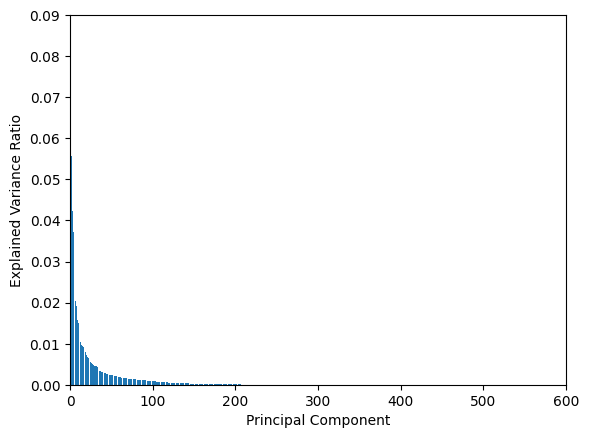

In [127]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 0.09)  # Adjust the y-axis limits here
plt.xlim(0,600)
plt.show()


Performing the PCA

In [101]:
# Fitting the PCA
pca = PCA(100)
pca_transformed = pca.fit_transform(X_norm)
principalDataframe = pd.DataFrame(data = pca_transformed)


Visualizing and analyzing the results

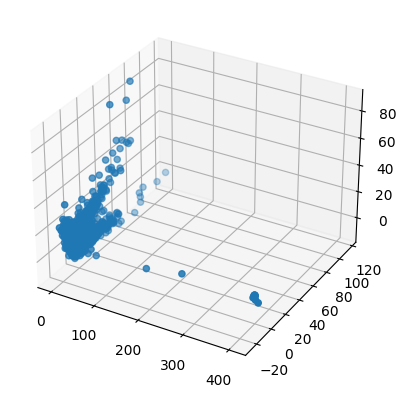

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2])
plt.show()